# Finding Heavy Traffic Indicators on the westbound of I-94

This project is going to analyze the westbound traffic on the I-94 Interstate highway with the main purpose of determining a few indicators of heavy traffic in it. These indicators can be weather type, time of the day, time of the week, etc.

You can find more information about the highway [here](https://en.wikipedia.org/wiki/Interstate_94) and the data we are going to use can be found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

To start, we are going to set up the environment, then we'll read the dataframes we need to start the analysis.

## 1 Setting up the environment
Let's import the libraries we are going to use, as well as telling the jupyter notebook to show our graphs in line and centralized.

In [1]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# showing graphs inline
%matplotlib inline

# to remove the annoying chained assignment warning
pd.options.mode.chained_assignment = None 

# telling pandas to show all columns when asked
pd.set_option('display.max_columns', None)

# centering the image outputs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    margin:auto;
}
.prompt 
    display:none;
}
}
</style>
""")

## 2 Importing the dataset
Moving on, we are going to import the dataset from my github repo, this way you can download this file and test it on your own if you want :)

In [2]:
# importing the file and reading it
file = 'https://raw.githubusercontent.com/nathpignaton/guided_projects/main/heavy-traffic-indicators-i-94/Metro_Interstate_Traffic_Volume.csv'
traffic = pd.read_csv(file)

traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## 3 Taking a first look at the information
To see how the incidents behave, we are going to plot a histogram to examine the distribution of the `traffic_volume` column.

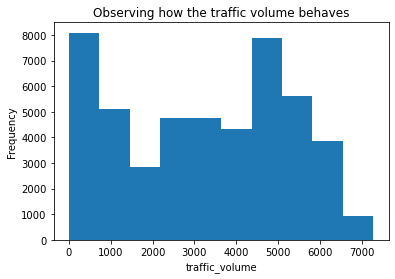

In [4]:
traffic['traffic_volume'].plot.hist()
plt.title("Observing how the traffic volume behaves")
plt.xlabel("traffic_volume")
plt.show()

In [5]:
# checking statistics information about the column
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

As we look to the graph above, we can see that the **volume of traffic is very low (0 to 700) in a high frequency (8000) and that it is also high (4500 to 5000) in the same high frequency (8000)**. 

This can be a sign of different vehicles flows in different times of the day. Looking at the statistics of the column, we see that the information makes sense, since that in the first 25% of the data, the amount of vehicles were only 1986 and at 75% of the data (the last 25%), the same place showed us 4933 vehicles.   

With that in mind, let's start looking at the volume differences between daytime and nighttime.  

To do so, we are going to convert the column `date_time` to real datetime format and also isolate the date and time information, to analyze it better.

## 4 Treating the time data
Let's start change the data type of the column, then we are going to separate the data into day and night information.

In [6]:
# turning the column to datetime
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [7]:
# separating night information
nighttime = traffic[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
              
nighttime.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963


In [8]:
# separating day information
daytime = traffic[(traffic['date_time'].dt.hour < 19) & (traffic['date_time'].dt.hour >= 7)]

daytime.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## 5 Comparing day and night information
Once we've saw that interesting aspect of our data, we can start comparing both day and night information to see if it is really true. To start, we are going to plot two graphs comparing both information side by side.

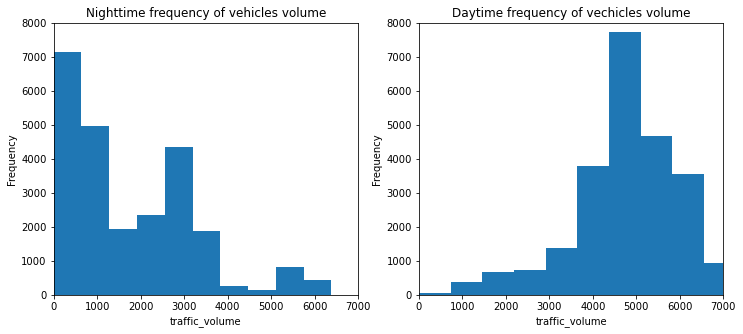

In [9]:
# creating the main figure and the subplots
plt.figure(figsize=(12,5))

# plotting first graph - nighttime
plt.subplot(1, 2, 1)
nighttime['traffic_volume'].plot.hist()
plt.title('Nighttime frequency of vehicles volume')
plt.xlabel('traffic_volume')
plt.xlim(0, 7000)
plt.ylim(0, 8000)
# plotting second graph - daytime
plt.subplot(1,2,2)
daytime['traffic_volume'].plot.hist()
plt.title('Daytime frequency of vechicles volume')
plt.xlabel('traffic_volume')
plt.xlim(0, 7000)
plt.ylim(0, 8000)
plt.show()

In [10]:
# checking the statistics to both dataframes
print("Nighttime Statistics:\n",nighttime.describe(), "\n\n", 
      "Daytime Statistics:\n", daytime.describe())

Nighttime Statistics:
                temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  24327.000000  24327.000000  24327.000000  24327.000000    24327.000000
mean     280.173600      0.139145      0.000192     45.672011     1785.377441
std       13.296357      1.110872      0.007434     40.048382     1441.951197
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%      271.700000      0.000000      0.000000      1.000000      530.000000
50%      281.379000      0.000000      0.000000     40.000000     1287.000000
75%      290.700000      0.000000      0.000000     90.000000     2819.000000
max      307.680000     55.630000      0.510000    100.000000     6386.000000 

 Daytime Statistics:
                temp      rain_1h       snow_1h    clouds_all  traffic_volume
count  23877.000000  23877.00000  23877.000000  23877.000000    23877.000000
mean     282.257596      0.53306      0.000253     53.122000     4762.047452
std       13.298885 

As we can see in the information above, the volume of traffic is significantly bigger in the **daytime, showing almost 5000 vehicles in more than 50% of the observations**. On the other hand, **nighttime shows us**, in the same 50% of the observations, **less than 1100 vehicles in the highway**.  

The right skewed Nighttime graph shows visually this informations, presenting the higher frequency of smaller traffic volumes.  
We can, also, see that in the left skewed Daytime graph, showing that the most frequent traffic volumes are the higher ones, specifically around 4500 and 5000. 

This tell us that our first idea of less cars circulating at some specific time of the day, was right and that **there are less vehicles in the road in the nighttime**.  

With that in mind, for now on **we are going to focus our analysis in the data correspondent to daytime**, since we are investigating heavy traffic situations. Moving forward, we are going to check how the traffic behaves in different months, days of the week and moments of the day.

## 6 Finding time indicators for heavy traffic
Since we are going to compare different moments in the year, we are going to divide this section into three: Month comparison, Day of the week comparison and Hour of the day comparison. Let's start it.

### 6.1 Month comparison
To this comparison, we are going to group our data calculating the average traffic volume per month, plotting a line plot at the end to see how it behaves. 

In [11]:
# creating the 'month' column
daytime['month'] = daytime['date_time'].dt.month

# grouping the information by average
grouped_month = daytime.groupby('month').mean()

grouped_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


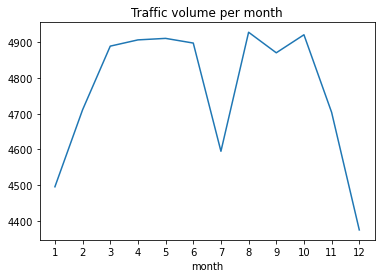

In [12]:
# plotting a line plot
plt.plot(grouped_month['traffic_volume'])
plt.title('Traffic volume per month')
plt.xlabel('month')
plt.xticks(range(1,13))
plt.show()

Looking at the graph, we can see an interesting pattern: traffic volume tends to be smaller in winter (December to February) and it drops, drastically, in July (a vacation month).   

This could tell us that this highway is not very used in vacation periods or not used because of other natural motives.  
To check it, we are going to plot another graph to see how **rain** and **snow** influence in this case.

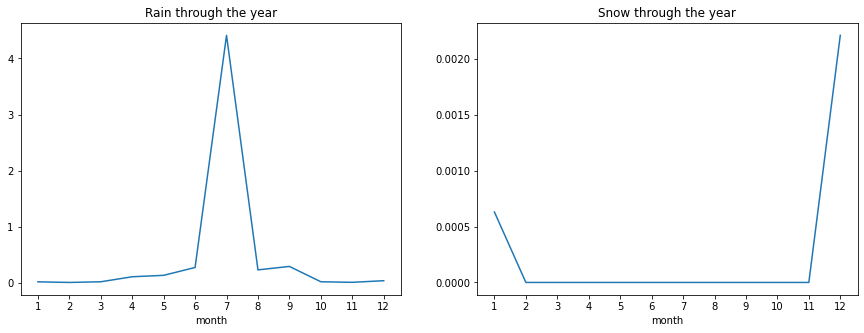

In [13]:
# plotting a line plot of rain
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(grouped_month['rain_1h'])
plt.title('Rain through the year')
plt.xlabel('month')
plt.xticks(range(1,13))
plt.subplot(1, 2, 2)
plt.plot(grouped_month['snow_1h'], label='Snow')
plt.title('Snow through the year')
plt.xlabel('month')
plt.xticks(range(1,13))
plt.show()

After the graph plotting, we can see that snow and rain can affect the volume of vehicles throughout the year, giving us a idea that the highway may not be the best option in this conditions or that people don't usually use it in this periods.  
Moving on, we are going to check how the volume changes depending on the day of the week.

### 6.2 Day of the week comparison
Based on our last information about the highway, we are going to look at the influence of the day of the week in the volume of vehicles on the highway. Let's stark grouping our dataset properly.

In [14]:
# grouping from 0 (monday) to 6 (sunday)
daytime['day_of_week'] = daytime['date_time'].dt.dayofweek
grouped_dayofweek = daytime.groupby(daytime['day_of_week']).mean()

grouped_dayofweek['traffic_volume']

day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

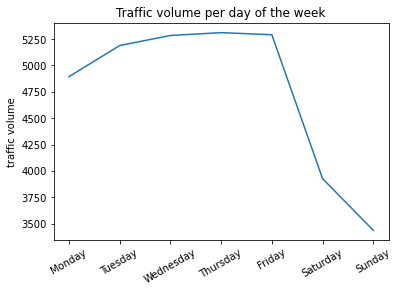

In [15]:
# generating the line plot
grouped_dayofweek['traffic_volume'].plot()
plt.title("Traffic volume per day of the week")
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(grouped_dayofweek.index, labels, rotation=30)
plt.xlabel('')
plt.ylabel('traffic volume')
plt.show()

The graph above shows us that the highway is more used in business days, since Saturday and Sunday have lower average traffic volumes.  
Moving on, let's check the different volumes in different hours of the day.

### 6.3 Hour of the day comparison
To start, we are going to do the same flow we did before: group the data by hour and plot the line graph.  
But after the previous analysis, we saw that the weekend days are going to lower our average. To prevent this from happening, we will separate the information into business and weekend days, plotting two different graphs.

In [16]:
# separating the datasets
business_days = daytime.copy()[daytime['date_time'].dt.dayofweek <= 4]
weekend_days = daytime.copy()[daytime['date_time'].dt.dayofweek >= 5]

# grouping the data by hour
business_days['hour'] = business_days['date_time'].dt.hour
weekend_days['hour'] = weekend_days['date_time'].dt.hour

grouped_business_hr = business_days.groupby('hour').mean()
grouped_weekend_hr = weekend_days.groupby('hour').mean()

print('Business days\n', grouped_business_hr['traffic_volume'],
      '\n \n', 'Weekend\n', grouped_weekend_hr['traffic_volume'])


Business days
 hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64 
 
 Weekend
 hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


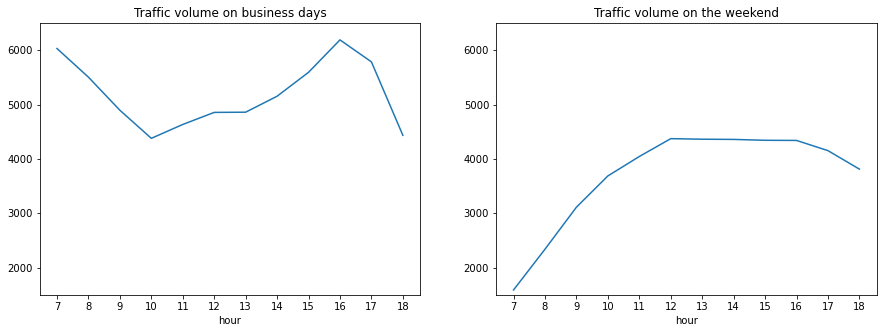

In [17]:
# plotting the lineplots
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
grouped_business_hr['traffic_volume'].plot()
plt.title('Traffic volume on business days')
plt.xlabel('hour')
plt.xticks(range(7, 19))
plt.ylim(1500, 6500)

plt.subplot(1,2,2)
grouped_weekend_hr['traffic_volume'].plot()
plt.title('Traffic volume on the weekend')
plt.xlabel('hour')
plt.xticks(range(7, 19))
plt.ylim(1500, 6500)
plt.show()

The graphs shows us that during the business days, the rush hours are 7 and 16, being the moments with the greater traffic volumes. That changes in the weekend, when the hours with greater vehicle volumes are after 11 or 12 o'clock.  
After this findings, we're going to look at the weather indicators, to see how the change in the weather influence how heavy the traffic is.

## 7 Finding weather indicators for heavy traffic
In this section, we are going to look at the columns related to weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`. To start, let's look at the correlation between the numerical columns.

In [18]:
# creating the dataset with the weather relevant columns
weather = daytime.drop(['month', 'day_of_week'], axis=1)
weather.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [19]:
# calculating the correlation between the numerical columns
weather.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.010815,-0.019286,-0.135519,0.128317
rain_1h,0.010815,1.000000,-0.000091,0.004993,0.003697
snow_1h,-0.019286,-0.000091,1.000000,0.027721,0.001265
clouds_all,-0.135519,0.004993,0.027721,1.000000,-0.032932
traffic_volume,0.128317,0.003697,0.001265,-0.032932,1.000000


To make the information easier to see, let's plot a quick bar plot.

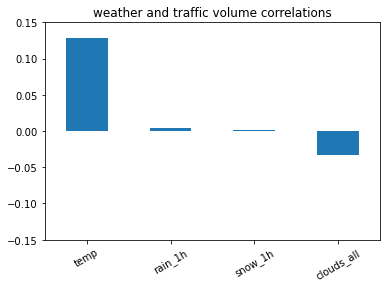

In [20]:
# bar plot of correlation
weather.corr()['traffic_volume'].drop('traffic_volume', axis=0).plot.bar()
plt.ylim(-0.15, 0.15)
plt.xticks(rotation=30)
plt.title('weather and traffic volume correlations')
plt.show()

As we can see above, the only column that could have some correlation with the traffic volume is `temp`, with a 0.128 value. But since it is below 0.25, we cannot say that there is any relationship.  

With that in mind, we can say that there are no reliable indicators between `temp`, `rain_1h`, `snow_1h` or `clouds_all`.  Moving on, let's check the categorical columns to see if they are good heavy traffic indicators.  

We are going to start aggregating the unique values by mean and plotting a graph to show our findings for both columns: `weather_main` and `weather_description`.

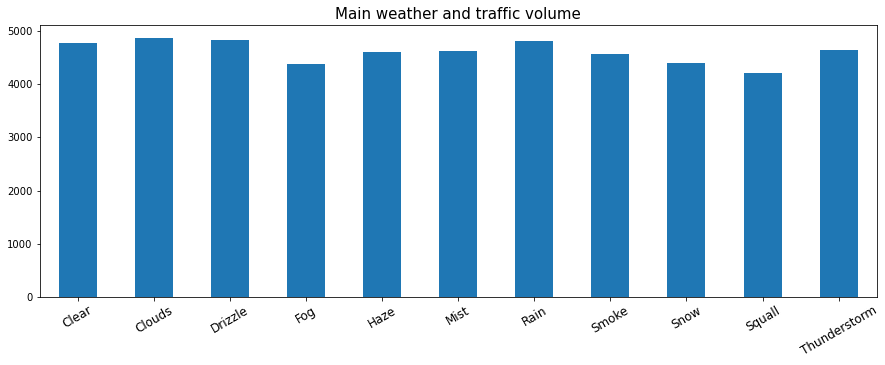

In [21]:
# grouping the information
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

# plotting the main weather graph
plt.figure(figsize=(15,5))
by_weather_main['traffic_volume'].plot.bar()
plt.title('Main weather and traffic volume', size=15)
plt.xticks(size=12, rotation=30)
plt.xlabel("")
plt.show()

This graph shows us that the main weather doesn't tell us much, bellow, we are going to take a better look into the weather descriptions.

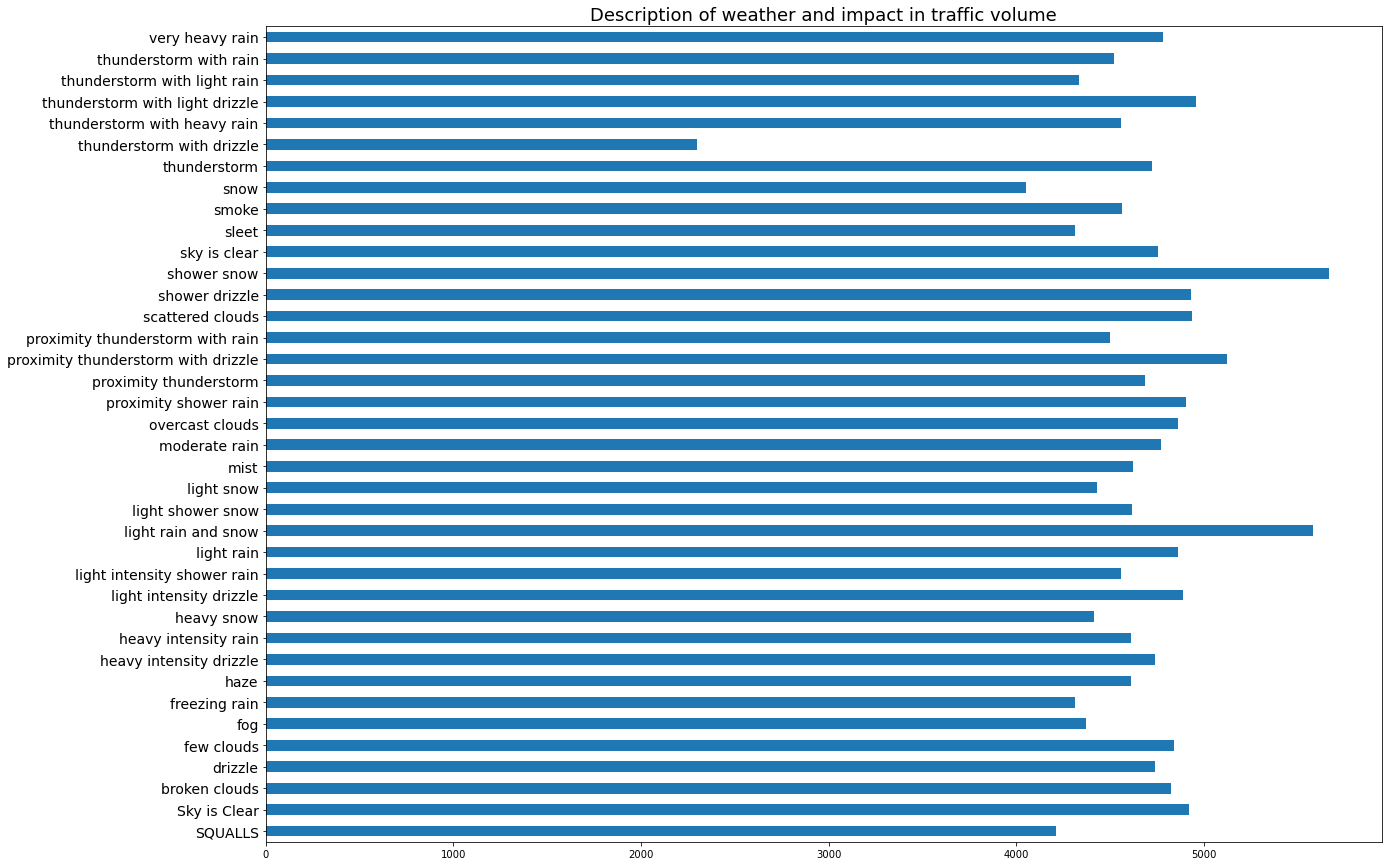

In [22]:
# plotting the weather description graph
plt.figure(figsize=(20,15))
by_weather_description['traffic_volume'].plot.barh()
plt.title('Description of weather and impact in traffic volume', size=18)
plt.yticks(size=14)
plt.ylabel("")
plt.show()

In the graph above, we can see that there are only three weather descriptions that appear in traffic volumes higher than 5000: `proximity thunderstorm with drizzle`, `shower snow`  and `light rain and snow`. After it we can say that they can be interesting heavier traffic indicator, since they show a higher average amount of vehicles in the highway.

## 8 Checking out nighttime traffic
To do a comparison, let's take a look at our nighttime data to see how different if behaves.

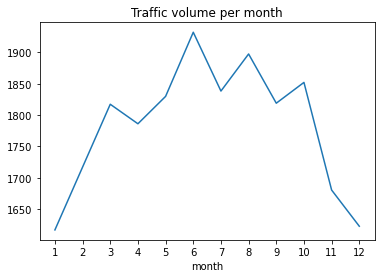

In [23]:
# creating the 'month' comparison
nighttime['month'] = nighttime['date_time'].dt.month

# grouping the information by average
grouped_month = nighttime.groupby('month').mean()

# plotting a line plot
plt.plot(grouped_month['traffic_volume'])
plt.title('Traffic volume per month')
plt.xlabel('month')
plt.xticks(range(1,13))
plt.show()

Looking at the graph above, we can see that the winter months also show a significant drop in the traffic volume. Being almost the same pattern as we saw in the daytime data.

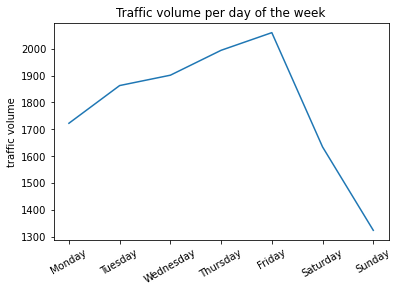

In [24]:
# grouping from 0 (monday) to 6 (sunday)
nighttime['day_of_week'] = nighttime['date_time'].dt.dayofweek
grouped_dayofweek = nighttime.groupby(nighttime['day_of_week']).mean()

# generating the line plot
grouped_dayofweek['traffic_volume'].plot()
plt.title("Traffic volume per day of the week")
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(grouped_dayofweek.index, labels, rotation=30)
plt.xlabel('')
plt.ylabel('traffic volume')
plt.show()

This graph shows us that the traffic volume in the workdays is also heavier than in the weekends, even in nighttime.

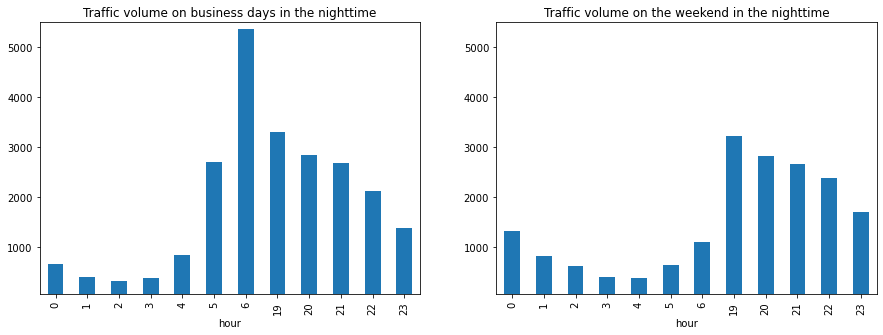

In [25]:
# separating the datasets
business_days = nighttime.copy()[nighttime['date_time'].dt.dayofweek <= 4]
weekend_days = nighttime.copy()[nighttime['date_time'].dt.dayofweek >= 5]

# grouping the data by hour
business_days['hour'] = business_days['date_time'].dt.hour
weekend_days['hour'] = weekend_days['date_time'].dt.hour

grouped_business_hr = business_days.groupby('hour').mean()
grouped_weekend_hr = weekend_days.groupby('hour').mean()

# plotting the lineplots
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
grouped_business_hr['traffic_volume'].plot.bar()
plt.title('Traffic volume on business days in the nighttime')
plt.xlabel('hour')
plt.ylim(50, 5500)

plt.subplot(1,2,2)
grouped_weekend_hr['traffic_volume'].plot.bar()
plt.title('Traffic volume on the weekend in the nighttime')
plt.xlabel('hour')
plt.ylim(50, 5500)
plt.show()

## 9 Conclusions

Through our project we saw that the traffic can change in different moments of the year, week and the day. Looking at our daytime data, we can say that:
* The traffic volume is usually heavier in warm and dry months, from March to June and August to October;  
* Is is also heavier in the business days;  
* Another conclusion is that the rush hours are 7 and 16 o'clock, having significantly more vehicles in the highway.

And also that it can be heavier when the weather presents itself as `proximity thunderstorm with drizzle`, `shower snow`  and `light rain and snow`, showing how the weather can influence how many cars will be on the road.

Our **nighttime data**, on the other hand, shows us that throughout the year the traffic volume changes almost like the daytime data, showing the same winter patters. We can see the same thing in the week data, where the traffic volume is larger in the workdays.

When we look at the nighttime traffic volume in different hours of the nights, we can see that it is higher in the beginning of the day, probably people going early to work or school, and a little bit higher in the beginning of the night, probably still a little bit of rush hour.

After the analysis we did, we can see that beyond the grater amount of traffic in different moments of the day, week and year, the weather plays an important role, probably saying something about how much people leave their houses in specific weather or about the conditions of the highway. 